## Observations and Insights 

In [ ]:
# 1: First off, this is a pleasantly clean data set. Working with it felt
#    intuitive and not "hair pulling" levels of frustrating to clean beforehand.
#    Thumbs up to whoever compiled the data ahead of time.

# 2: While Capomulin and Ramicane are both easily the most used treatments for
#    the mice in the study, Ramicane seems to be the best contender by a small
#    margin over Capomulin. Both Capomulin and Ramicane seem to be better
#    options than the other two most used treatments, Infubinol and Ceftamin.
#    Surprisingly, the top four regimens has only a single outlier in Infubinol.

# 3: 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

merged_mice = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merged_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
number_of_mice_ID = merged_mice["Mouse ID"].count()
number_of_mice_ID

1893

In [3]:
duplicate_mice = merged_mice[merged_mice.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
clean_df = merged_mice.drop_duplicates("Mouse ID")
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [6]:
clean_df_total = clean_df["Mouse ID"].count()
clean_df_total

249

## Summary Statistics

In [7]:
mean = merged_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = merged_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = merged_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
standard_deviation = merged_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = merged_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

drug_regimen_summary = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_deviation, "SEM": sem})
drug_regimen_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

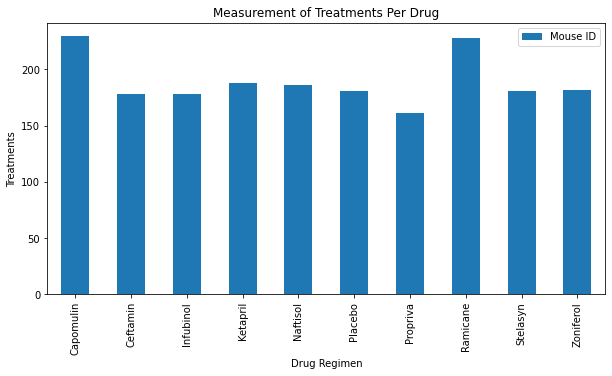

<Figure size 432x288 with 0 Axes>

In [9]:
regimen_data = pd.DataFrame(merged_mice.groupby(["Drug Regimen"]).count()).reset_index()
drug_measurements = regimen_data[["Drug Regimen", "Mouse ID"]]
drug_measurements = drug_measurements.set_index("Drug Regimen")
drug_measurements.plot(kind="bar", figsize=(10,5))
plt.title("Measurement of Treatments Per Drug")
plt.ylabel("Treatments")
plt.show()
plt.tight_layout()

Text(0, 0.5, 'Treatments')

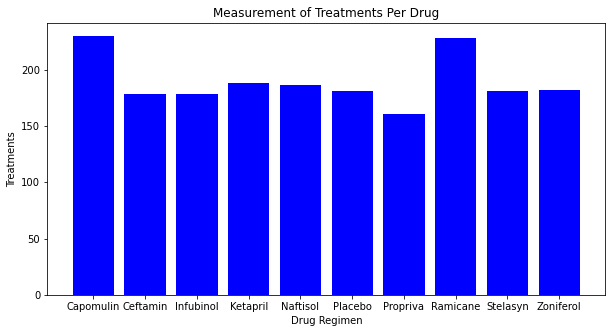

In [10]:
list_of_drugs = drug_regimen_summary.index.tolist()
#list_of_drugs
count_of_drugs = (merged_mice.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
#count_of_drugs
x_axis = np.arange(len(count_of_drugs))
x_axis = list_of_drugs
plt.figure(figsize=(10,5))
plt.bar(x_axis, count_of_drugs, color="b", align="center")
plt.title("Measurement of Treatments Per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Treatments")

Text(0, 0.5, '')

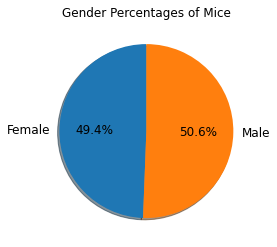

In [11]:
gender_count = pd.DataFrame(merged_mice.groupby(["Sex"]).count()).reset_index()
#gender_count
gender_count = gender_count[["Sex", "Mouse ID"]]
#gender_count
gender_count.plot(kind="pie", y = "Mouse ID", autopct="%1.1f%%", startangle=90, shadow=True, labels=gender_count["Sex"], legend=False, fontsize=12)
plt.title("Gender Percentages of Mice")
plt.ylabel("")

Text(0.5, 1.0, 'Gender Percentages of Mice')

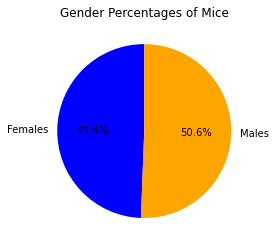

In [12]:
gender_count = (merged_mice.groupby(["Sex"])["Mouse ID"].count()).tolist()
labels = ["Females", "Males"]
colors = ["blue", "orange"]
plt.pie(gender_count, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90)
plt.title("Gender Percentages of Mice")

## Quartiles, Outliers and Boxplots

In [13]:
last_timepoint = pd.DataFrame(merged_mice.groupby("Mouse ID")["Timepoint"].max().sort_values()).reset_index().rename(columns={"Timepoint": "Last Timepoint"})
timepoint_merge = pd.merge(merged_mice, last_timepoint, on="Mouse ID")
timepoint_merge.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Last Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [14]:
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
treatment_values = []

for treatment in treatments:
    holding_df = timepoint_merge.loc[timepoint_merge["Drug Regimen"] == treatment]
    final_tumor_volume = holding_df.loc[holding_df["Timepoint"] == holding_df["Last Timepoint"]]
    values = final_tumor_volume["Tumor Volume (mm3)"]
    treatment_values.append(values)
    quartiles = values.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"IQR for {treatment} is {iqr}.")
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Lower bound for {treatment} is {lower_bound}.")
    print(f"Upper bound for {treatment} is {upper_bound}.")
    outliers = (values.loc[(final_tumor_volume["Tumor Volume (mm3)"] >= upper_bound) | (final_tumor_volume["Tumor Volume (mm3)"] <= lower_bound)]).count()
    print(f"The number of outliers is {outliers}.")

IQR for Capomulin is 7.781863460000004.
Lower bound for Capomulin is 20.70456164999999.
Upper bound for Capomulin is 51.83201549.
The number of outliers is 0.
IQR for Ramicane is 9.098536719999998.
Lower bound for Ramicane is 17.912664470000003.
Upper bound for Ramicane is 54.30681135.
The number of outliers is 0.
IQR for Infubinol is 11.477135160000003.
Lower bound for Infubinol is 36.83290494999999.
Upper bound for Infubinol is 82.74144559000001.
The number of outliers is 1.
IQR for Ceftamin is 15.577752179999997.
Lower bound for Ceftamin is 25.355449580000002.
Upper bound for Ceftamin is 87.66645829999999.
The number of outliers is 0.


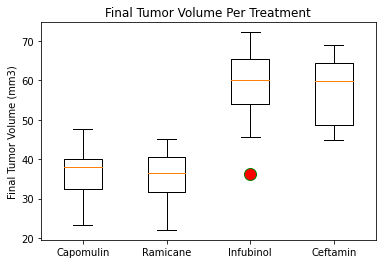

In [15]:
# Google brought me to "https://stackoverflow.com/questions/43342564/flier-colors-in-boxplot-with-matplotlib" which seems useful for this particular assignment.
flierprops = dict(marker="o", markerfacecolor="r", markersize=12, linestyle="none", markeredgecolor="g")
plt.boxplot(treatment_values, flierprops=flierprops)
plt.title("Final Tumor Volume Per Treatment")
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()

## Line and Scatter Plots

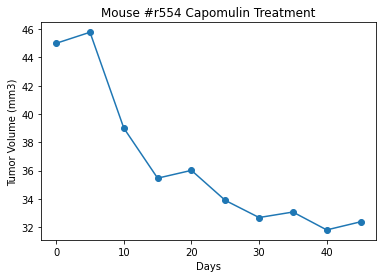

In [16]:
my_main_mouse = merged_mice.loc[merged_mice["Mouse ID"] == "r554"]
plt.plot(my_main_mouse["Timepoint"], my_main_mouse["Tumor Volume (mm3)"], marker="o")
plt.title("Mouse #r554 Capomulin Treatment")
plt.xlabel("Days")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

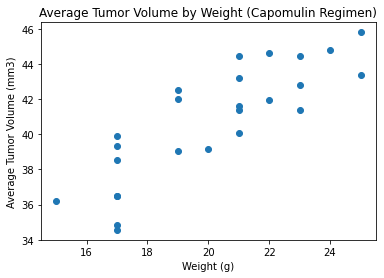

In [17]:
capomulin = merged_mice.loc[merged_mice["Drug Regimen"] == "Capomulin"]
average_tumor_volume = pd.DataFrame(capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().sort_values()).reset_index().rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume"})
average_tumor_volume = pd.merge(capomulin, average_tumor_volume, on="Mouse ID")
average_tumor_volume = average_tumor_volume[["Weight (g)", "Average Tumor Volume"]].drop_duplicates()
x = average_tumor_volume["Weight (g)"]
y = average_tumor_volume["Average Tumor Volume"]
plt.scatter(x,y)
plt.title("Average Tumor Volume by Weight (Capomulin Regimen)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between the weight and average tumor volume in the mice receiving the Capomulin regimen is 0.84.


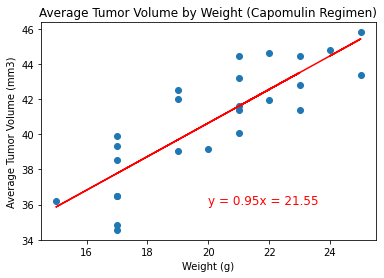

In [20]:
capomulin = merged_mice.loc[merged_mice["Drug Regimen"] == "Capomulin"]
average_tumor_volume = pd.DataFrame(capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().sort_values()).reset_index().rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume"})
average_tumor_volume = pd.merge(capomulin, average_tumor_volume, on="Mouse ID")
average_tumor_volume = average_tumor_volume[["Weight (g)", "Average Tumor Volume"]].drop_duplicates()
x = average_tumor_volume["Weight (g)"]
y = average_tumor_volume["Average Tumor Volume"]
correlation = st.pearsonr(x,y)
print(f"The correlation between the weight and average tumor volume in the mice receiving the Capomulin regimen is {round(correlation[0],2)}.")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line = "y = " + str(round(slope,2)) + "x = " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.title("Average Tumor Volume by Weight (Capomulin Regimen)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.annotate(line, (20,36), fontsize=12, color="red")
plt.show()